<a href="https://colab.research.google.com/github/mateosuster/pythonungs/blob/master/codigos/Visualizacion_con_Pandas%2C_Matplotlib_y_Plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización con Pandas

Recorrido por las diferentes opciones que tenemos a la hora de realizar gráficos. Se utilizarán [Matplotlib](https://matplotlib.org/stable/index.html) y [Plotly](https://plotly.com/) como backend de los gráficos y también resutará utils la libreria [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html) para realizar visualizaciones de manera más simple y rápida.


Empezamos, importamos las librerias a utilizar.

In [1]:
!pip install pandas==1.3.5 wbdata==0.3.0
import wbdata
print(wbdata.__version__)

0.3.0


In [2]:
# !pip install wbgapi

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [4]:
import collections
# Redirect 'Sequence' from 'collections.abc' to 'collections'
if not hasattr(collections, 'Sequence'):
    import collections.abc
    collections.Sequence = collections.abc.Sequence


## Matplotlib

Matplotlib será el backend de nuestros gráficos. Veremos que cada gráfico de matplotlib se compone por un objeto del tipo **Figure**, que será donde se grafiquen los datos. Cada figura contiene uno o más ejes, llamados **Axes**. Dentro de estos objetos podremos acceder a métodos y atributos que nos permitirán graficar los datos y configurar nuestros gráficos.

Primer acercamiento

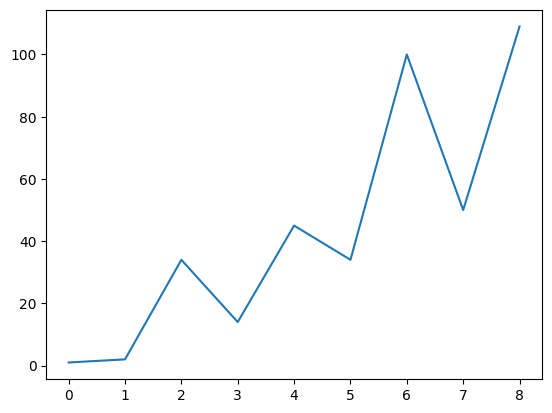

In [5]:
plt.plot([1,2,34,14,45,34,100, 50,109])

Ahora creamos un objeto Figure (fig) y otro Axes (ax). Luegos gráficamos unos puntos.

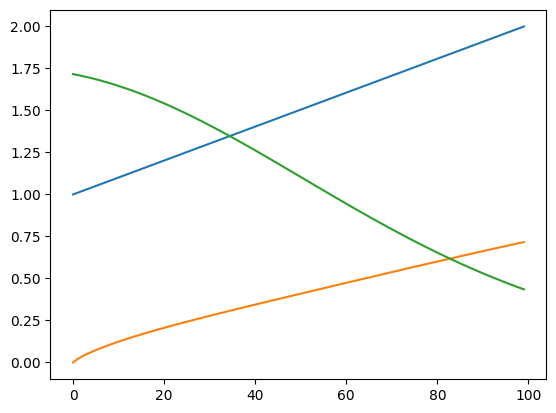

In [6]:
fig, ax = plt.subplots()

z1 = np.linspace(1, 2, 100)
z2 = np.log(z1) ** np.sin(z1)
z3 = np.exp(z1) ** np.cos(z1)

ax.plot(z1)
ax.plot(z2)
ax.plot(z3)

fig.show()

Le podemos agregar un título y nombre a los ejes, al igual que etiquetas a cada una de las trazas.

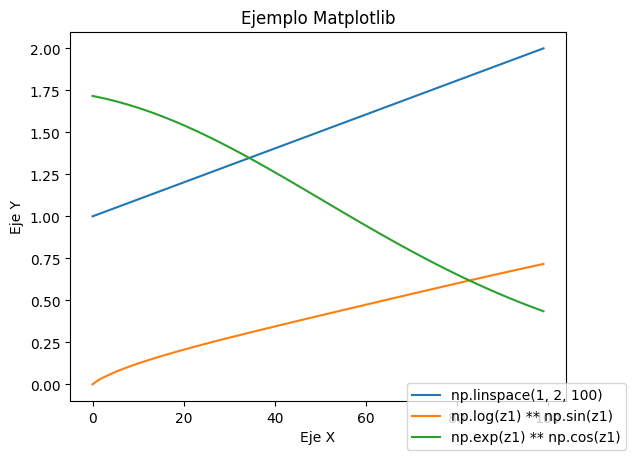

In [7]:
fig, ax = plt.subplots()

ax.set_title('Ejemplo Matplotlib')
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')

ax.plot(z1, label = 'np.linspace(1, 2, 100)')
ax.plot(z2, label = 'np.log(z1) ** np.sin(z1)')
ax.plot(z3, label = 'np.exp(z1) ** np.cos(z1)')

fig.legend(loc=4, ) # Muestra leyenda
fig.show()

Tambien podemos visualizar tres gráficos distintos en una misma figura. De la misma manera se podría configurar cada uno de los ejes.

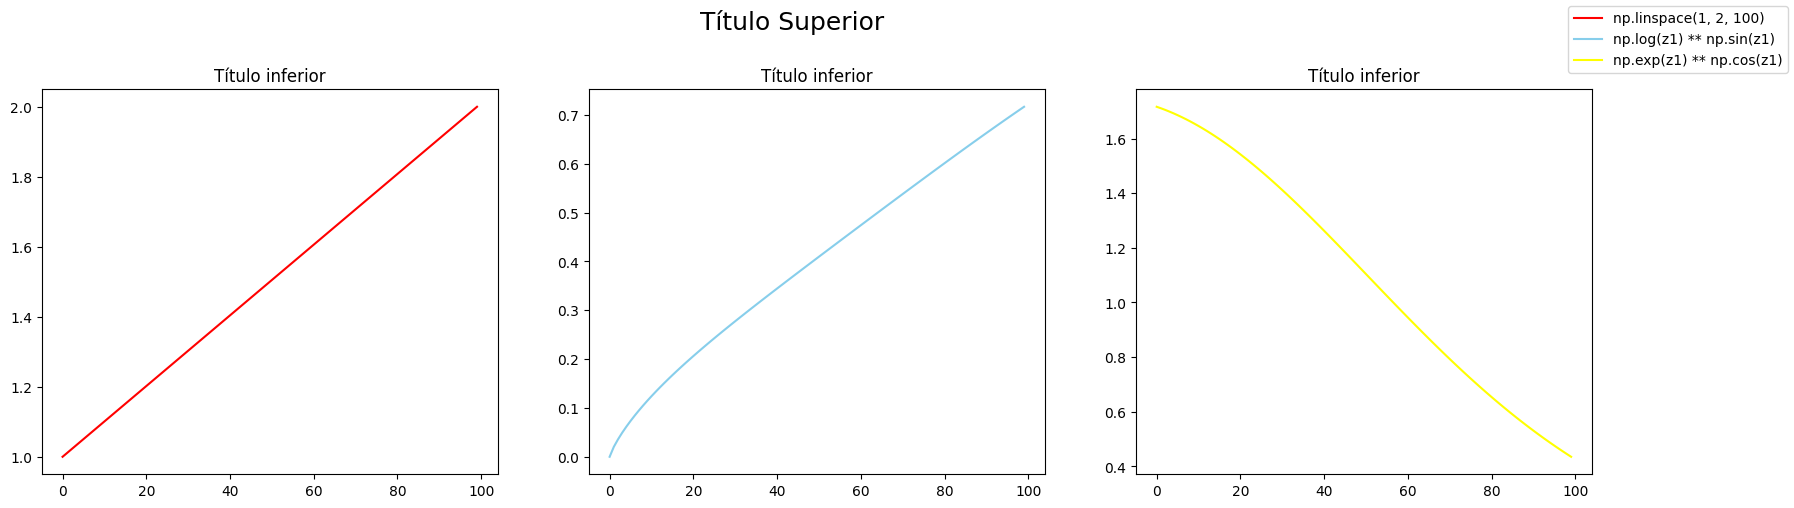

In [8]:
fig, ax = plt.subplots(figsize = (20,5), ncols=3, nrows=1)

# Titulo de la figura
fig.suptitle('Título Superior', fontsize=18, y = 1.04)

# Titulo de cada eje
ax[0].set_title('Título inferior')
ax[1].set_title('Título inferior')
ax[2].set_title('Título inferior')

ax[0].plot(z1, color='red', label = 'np.linspace(1, 2, 100)')
ax[1].plot(z2, color='skyblue', label = 'np.log(z1) ** np.sin(z1)')
ax[2].plot(z3, color='yellow', label = 'np.exp(z1) ** np.cos(z1)')


fig.legend()
fig.show()

## World Bank Data API

Vemos el principal funcionamiento de la API.

Se sugiere recorrer la fuente de datos.

In [9]:
wbdata.get_source()

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclusion Indicators
  34  Glob

In [10]:
# Source 12: indicares de genero
wbdata.get_indicator(source=14)

id                         name
-------------------------  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
account.t.d                Account (% age 15+)
account.t.d.1              Account, female (% age 15+)
account.t.d.2              Account, male (% age 15+)
borrow.any                 Borrowed any money (% age 15+)
borrow.any.1               Borrowed any money, female (% age 15+)
borrow.any.2               Borrowed any money, male (% age 15+)
fin1.1a                    First financial institution account ever was opened to receive a wage payment (% age 15+)
fin1.1ab                   First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)
fin1.1b                    First financial institution ever account was opened to receive money from the government (% age 15+)
fin1.t.d     

## Graficando con Pandas

### Grafico de torta

In [11]:
indicadores = {'HD.HCI.LAYS.FE':'educacion_femenina','HD.HCI.LAYS.MA':'educacion_masculina'}

data = wbdata.get_dataframe(indicadores, country=['USA','ARG'])

df = pd.DataFrame(data=data)

In [12]:
df.head()

educacion_femenina  educacion_masculina
country   date                                         
Argentina 2020            8.494050             8.332441
          2019                 NaN                  NaN
          2018            8.796667             8.681369
          2017            8.970000             8.770000
          2016                 NaN                  NaN

In [13]:
aux = df.reset_index()
aux = aux.loc[aux['date'] == '2020'] # Vemos que la fecha esta en formato string.
aux['educacion_femenina'] = aux['educacion_femenina'].astype(float)
aux['educacion_masculina'] = aux['educacion_masculina'].astype(float)
aux.set_index('country', inplace=True)
aux = aux[['educacion_femenina', 'educacion_femenina']]

Hacemos un gráfico de tortas para comparar la educación por género entre Argentina y Estado Unidos de manera relativa.

Text(0.5, 1.0, 'Educación masculina USA vs ARG')

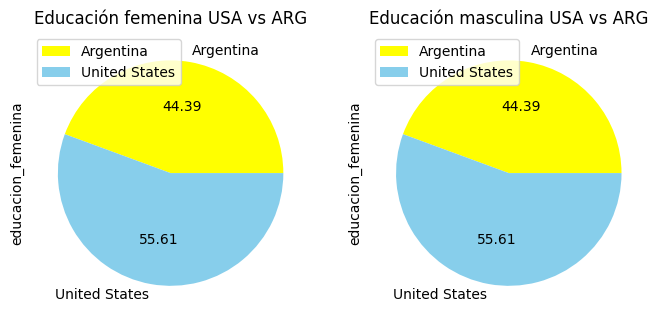

In [14]:
ax1, ax2 = aux.plot.pie(subplots=True,
                        figsize=(8,4),
                        colors=['yellow', 'skyblue'],
                      autopct='%.2f')

ax1.set_title('Educación femenina USA vs ARG', color='black')
ax2.set_title('Educación masculina USA vs ARG', color='black')

### Serie de tiempo

Vemos la educacion en la poblacion a lo largo de los años

In [44]:
date_time = datetime.datetime(1950,1,1), datetime.datetime(2010,1,1)


# Porcentaje de no educacion en la población
indicadores = {'BAR.NOED.1519.ZS':'15-19','BAR.NOED.2024.ZS':'20-24',
              'BAR.NOED.2529.ZS':'25-29', 'BAR.NOED.3034.ZS':'30-34',
              'BAR.NOED.3539.ZS':'35-39' , 'BAR.NOED.4044.ZS':'40-44',
              'BAR.NOED.4549.ZS':'45-49', 'BAR.NOED.5054.ZS':'50-54',
              'BAR.NOED.5559.ZS':'55-59'}

data = wbdata.get_dataframe(indicadores, country = 'ARG', data_date = date_time)
df = pd.DataFrame(data=data)

In [16]:
print('Valores nulos:',sum(df.isna().sum()))

Valores nulos: 360


El dataset contiene va desde el año 1950 a 2010 y con datos cada cinco años. Como vamos a enfocarnos en la visualizacion dejamos los datos nulos de lado.

In [46]:
df.dropna(inplace=True)

In [47]:
df.head(3)

,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59
date,,,,,,,,,
2010,0.30,0.25,0.25,0.80,0.29,0.72,0.72,1.20,1.20
2005,0.30,0.25,0.80,0.29,0.72,0.72,1.20,1.20,2.44
2000,0.83,1.30,1.62,2.05,2.74,2.74,4.09,4.09,5.49


Breve resumen descriptivo

In [18]:
df.describe()

,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,1.630909,2.356364,3.466364,4.227273,4.473636,4.862727,5.447273,6.072727,6.967273
std,1.117448,1.485680,3.126382,3.429446,3.403014,3.468573,3.393211,3.576638,3.676621
min,0.300000,0.250000,0.250000,0.290000,0.290000,0.720000,0.720000,1.200000,1.200000
25%,0.905000,1.460000,1.765000,2.675000,3.085000,3.170000,3.955000,4.495000,5.330000
50%,1.360000,1.900000,3.190000,3.430000,3.600000,4.400000,4.900000,5.400000,6.500000
75%,2.285000,3.650000,4.000000,4.090000,4.900000,5.400000,6.550000,7.500000,9.600000
max,4.000000,4.400000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000


Graficamos el porcentaje de la poblacion no educado de toda la población para distintas categorías de edades.

([<matplotlib.axis.XTick at 0x7866c8880a30>,
 [Text(0, 0, '15-19'),
  Text(1, 0, '20-24'),
  Text(2, 0, '25-29'),
  Text(3, 0, '30-34'),
  Text(4, 0, '35-39'),
  Text(5, 0, '40-44'),
  Text(6, 0, '45-49'),
  Text(7, 0, '50-54'),
  Text(8, 0, '55-59')])

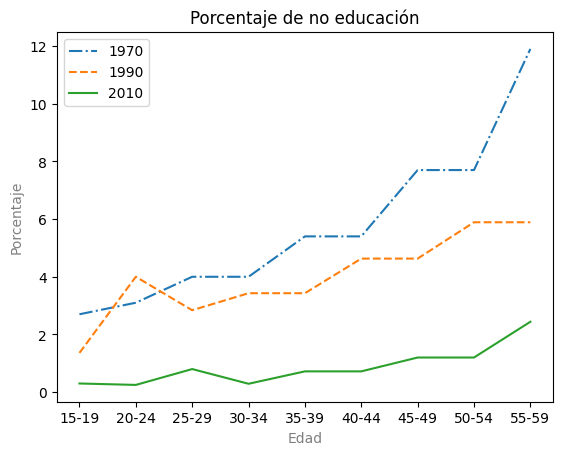

In [19]:
df.iloc[8,].plot(style = '-.', label = '1970', legend=True)
df.iloc[5,].plot(style = ('--'), label = '1990', legend = True)
df.iloc[1,].plot(style = '-', label = '2010', legend = True)
plt.title('Porcentaje de no educación')
plt.ylabel('Porcentaje',color = 'grey')
plt.xlabel('Edad', color = 'grey')
plt.xticks([0,1,2,3,4,5,6,7,8],df.columns.tolist())

Esta vez lo hacemos sólo para la población femenina.

In [20]:
date_time = datetime.datetime(1950,1,1), datetime.datetime(2010,1,1)

# Porcentaje de mujeres sin educacion por rango etario
indicadores = {'BAR.NOED.1519.FE.ZS':'15-19','BAR.NOED.2024.FE.ZS':'20-24',
              'BAR.NOED.2529.FE.ZS':'25-29', 'BAR.NOED.3034.FE.ZS':'30-34',
              'BAR.NOED.3539.FE.ZS':'35-39' , 'BAR.NOED.4044.FE.ZS':'40-44',
              'BAR.NOED.4549.FE.ZS':'45-49', 'BAR.NOED.5054.FE.ZS':'50-54',
              'BAR.NOED.5559.FE.ZS':'55-59'}

df1 = wbdata.get_dataframe(indicadores, country = 'ARG', data_date=date_time)
df1.dropna(inplace = True)

Porcentaje no educado de la población femenina.

([<matplotlib.axis.XTick at 0x7866cab8bca0>,
 [Text(0, 0, '15-19'),
  Text(1, 0, '20-24'),
  Text(2, 0, '25-29'),
  Text(3, 0, '30-34'),
  Text(4, 0, '35-39'),
  Text(5, 0, '40-44'),
  Text(6, 0, '45-49'),
  Text(7, 0, '50-54'),
  Text(8, 0, '55-59')])

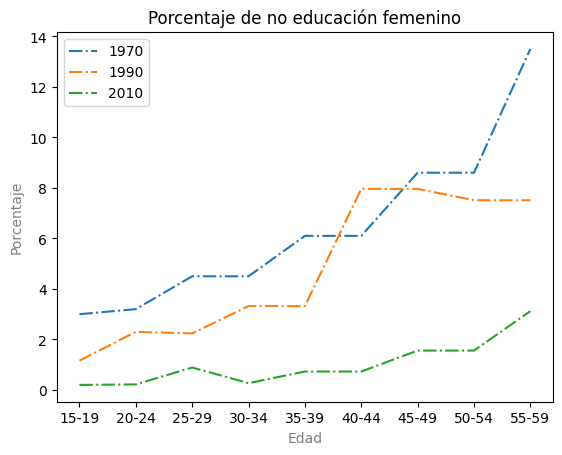

In [21]:
df1.iloc[8,].plot(style = '-.', label = '1970', legend=True)
df1.iloc[5,].plot(style = '-.', label = '1990', legend = True)
df1.iloc[1,].plot(style = '-.', label = '2010', legend = True)
plt.title('Porcentaje de no educación femenino')
plt.ylabel('Porcentaje',color = 'grey')
plt.xlabel('Edad', color = 'grey')
plt.xticks([0,1,2,3,4,5,6,7,8],df.columns.tolist())

Ahora comparamos la educacion de la población total vs población femenina en los años 1970 y 2010.

([<matplotlib.axis.XTick at 0x7866cac40280>,
 [Text(0, 0, '15-19'),
  Text(1, 0, '20-24'),
  Text(2, 0, '25-29'),
  Text(3, 0, '30-34'),
  Text(4, 0, '35-39'),
  Text(5, 0, '40-44'),
  Text(6, 0, '45-49'),
  Text(7, 0, '50-54'),
  Text(8, 0, '55-59')])

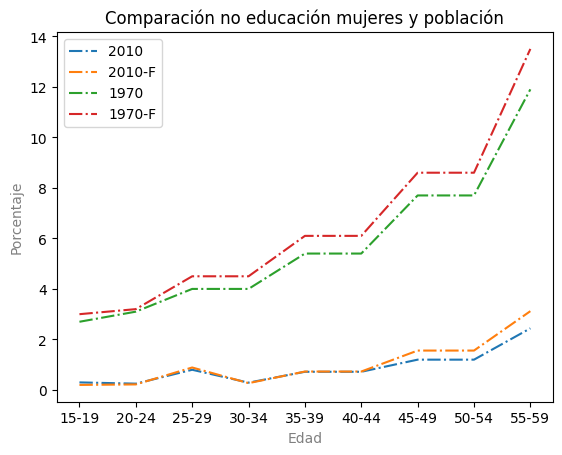

In [22]:
# 2010
df.iloc[1,].plot(style = '-.', label = '2010', legend = True)
df1.iloc[1,].plot(style = '-.', label = '2010-F', legend = True)
# 1970
df.iloc[8,].plot(style = '-.', label = '1970', legend=True)
df1.iloc[8,].plot(style = '-.', label = '1970-F', legend=True)
plt.title('Comparación no educación mujeres y población')
plt.xlabel('Edad', color = 'grey')
plt.ylabel('Porcentaje', color = 'grey')
plt.xticks([0,1,2,3,4,5,6,7,8],df.columns.tolist())

Vemos que luego de 40 años la brecha se acoto.

## Gráfico de barras


In [23]:
df.head(5)

,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59
date,,,,,,,,,
2010,0.30,0.25,0.25,0.80,0.29,0.72,0.72,1.20,1.20
2005,0.30,0.25,0.80,0.29,0.72,0.72,1.20,1.20,2.44
2000,0.83,1.30,1.62,2.05,2.74,2.74,4.09,4.09,5.49
1995,0.98,1.62,1.91,3.43,3.43,3.82,3.82,5.17,5.17
1990,1.60,1.80,4.00,4.00,3.60,3.60,4.90,4.90,6.50


Text(0, 0.5, 'Porcentaje')

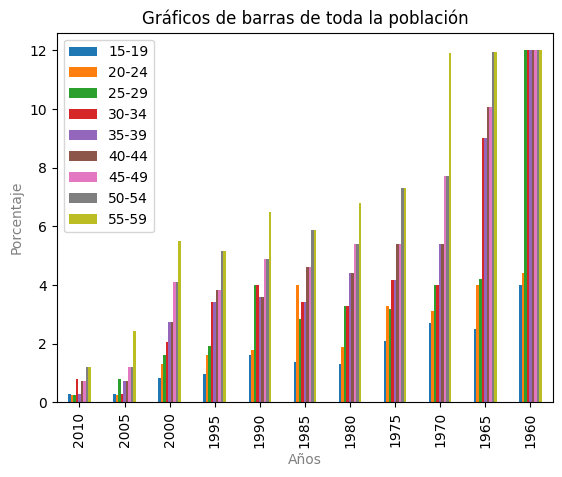

In [24]:
ax = df.plot(kind='bar',
       title='Gráficos de barras de toda la población')
ax.set_xlabel('Años',color='grey')
ax.set_ylabel('Porcentaje',color='grey')

Lo hacemos en horizontal y apilamos la población en una barra.

Text(0, 0.5, 'Años')

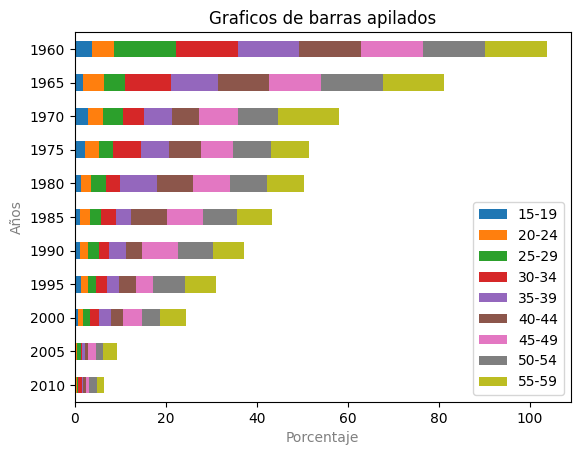

In [25]:
ax = df1.plot.barh(stacked=True)
ax.set_title('Graficos de barras apilados')
ax.set_xlabel('Porcentaje',color='grey')
ax.set_ylabel('Años',color='grey')

## Histogramas

Vamos a trabajar con el [Indice de facilidad para hacer negocios](https://es.wikipedia.org/wiki/%C3%8Dndice_de_facilidad_para_hacer_negocios) en distintos países.


Seleccionamos los paises a utilizar y creamos el dataframe.

In [26]:
paises = [i['id'] for i in wbdata.get_country(incomelevel=['LIC','HIC'])]

# Seleccionamos nuestros nuevos datos
indicadores = {"IC.BUS.EASE.XQ": "indice_negocio", "NY.GDP.PCAP.PP.KD": "PIBPC"}

data = wbdata.get_dataframe(indicadores, country=paises, convert_date=True)
df = pd.DataFrame(data=data)

In [27]:
df.dropna(inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 83 entries, ('Afghanistan', Timestamp('2019-01-01 00:00:00')) to ('United States', Timestamp('2019-01-01 00:00:00'))
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   indice_negocio  83 non-null     float64
 1   PIBPC           83 non-null     float64
dtypes: float64(2)
memory usage: 9.1+ KB


In [29]:
df.head()

,,indice_negocio,PIBPC
country,date,,
Afghanistan,2019-01-01,173.0,2933.958598
United Arab Emirates,2019-01-01,16.0,70638.732731
Antigua and Barbuda,2019-01-01,113.0,29394.629012
Australia,2019-01-01,14.0,57188.294949
Austria,2019-01-01,27.0,65721.990480


Text(0, 0.5, 'Frecuencia')

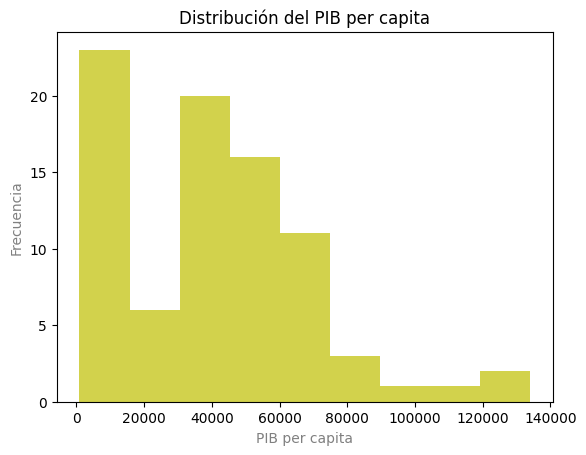

In [30]:
plt.figure()
df['PIBPC'].plot.hist(alpha=0.7,  # Con alpha seteamos la transparencia
                     color='y',
                     bins=9,
                     title='Distribución del PIB per capita')
plt.xlabel('PIB per capita', color='grey')
plt.ylabel('Frecuencia',color='grey')

## Box plot

<Axes: title={'center': 'Diagrma de caja PIB'}>

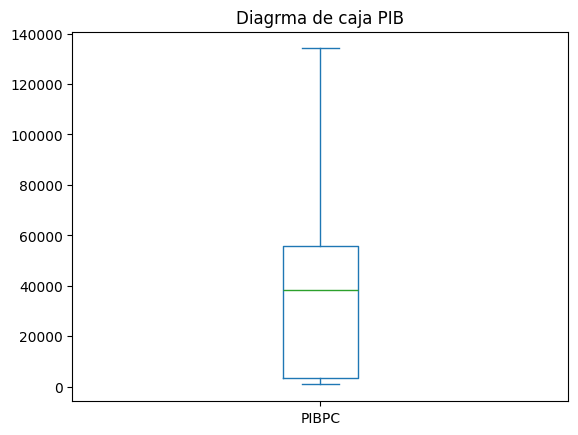

In [31]:
df['PIBPC'].plot.box(title='Diagrma de caja PIB')

Recordamos que dentro de la caja se encuentra el 50% de la población. La línea verde indica la mediana.

## Scatter plot

Hacemos un gráfico de dispersión entre las variables PIB p/ capita e Indice de facilidad p/ hacer negocios.

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, 'PIB per capita')

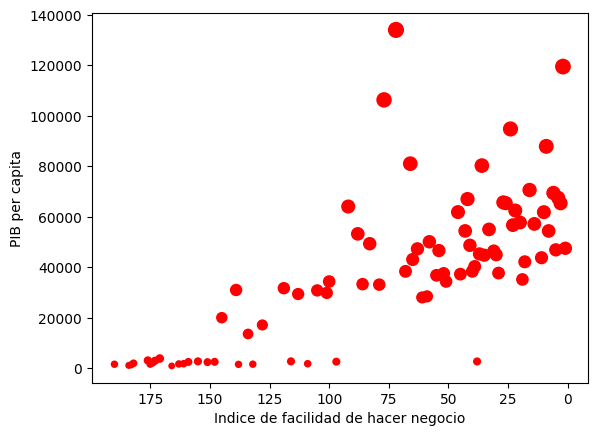

In [32]:
df.plot.scatter(y='PIBPC', x='indice_negocio',
                c='r',
                s=df['PIBPC']**0.4    # Con s seteamos el tamaño de los puntos
               )

plt.gca().invert_xaxis()
plt.xlabel('Indice de facilidad de hacer negocio')
plt.ylabel('PIB per capita')

Es intuitivo que en los países con más facilidad para los negocios tienen un PIB per capita más alto.

Finalmente vemos una variante al gráfico de dispersión, un gráfico hexagonal.

Text(0, 0.5, 'PIB per capita')

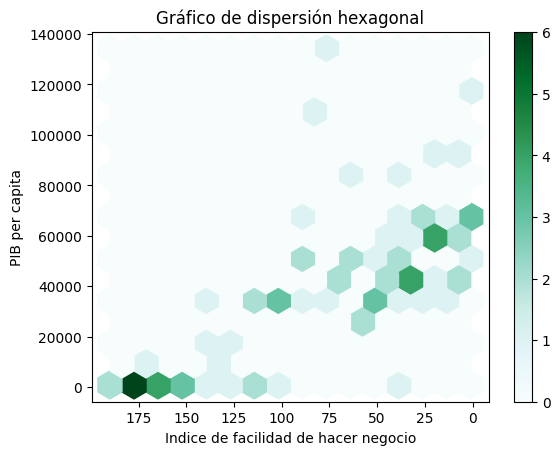

In [33]:
df.plot.hexbin(y='PIBPC', x='indice_negocio', gridsize=15,
              title='Gráfico de dispersión hexagonal')
plt.gca().invert_xaxis()
plt.xlabel('Indice de facilidad de hacer negocio')
plt.ylabel('PIB per capita')

## Ejercicio

Haga un gráfico para ver la evolución de los inscriptos a las distintas instancias educativas, diferenciando pr género, a lo largo del tiempo. Puede ayudarse con la [documentación](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [ ]:
indicadores = {'SE.PRM.ENRR.FE':'primario-femenino','SE.PRM.ENRR.MA':'primario-masculino',
               'SE.SEC.ENRR.FE':'secundario-femenino','SE.SEC.ENRR.MA':'segundario-masculino',
               'SE.TER.ENRR.FE':'terciario-femenino','SE.TER.ENRR.MA':'terciario-masculino'}

df = wbdata.get_dataframe(indicadores,country='ARG')

Utilize el período [2000-2017].

In [ ]:
# df.iloc...

Una vez que tenga los datos a utilizar realice el gráfico. Pruebe agregarle una leyenda y cambiar el color. Tambíen puede etiquetar los ejes y elegir un título.

In [ ]:
# df.plot...

## Plotly

En esta sección utilizaremos la librería [Plotly](https://plotly.com/) para realizar los gráficos. En principio se usará [Plotly Express](https://plotly.com/python/plotly-express/) Luego, en más profundidad se vera un ejemplo con la librería [Plotly Graph Objects](https://plotly.com/python/graph-objects/) que nos permitirá una mayor configuración de los gráficos.

In [34]:
import plotly.express as px
import plotly.graph_objects as go

In [35]:
a = pd.read_csv('https://unket.s3-sa-east-1.amazonaws.com/data/dataset_reporte_covid_sitio_gobierno.csv')
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51844 entries, 0 to 51843
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FECHA          51844 non-null  object 
 1   TIPO_REPORTE   51844 non-null  object 
 2   TIPO_DATO      51844 non-null  object 
 3   SUBTIPO_DATO   51844 non-null  object 
 4   VALOR          51844 non-null  float64
 5   FECHA_PROCESO  51844 non-null  object 
 6   ID_CARGA       51844 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 2.8+ MB


In [36]:
a['FECHA'] = pd.to_datetime(a['FECHA'], format='%d%b%Y:%H:%M:%S')

Veamos la ocupacion de camas en hospitales del sistema público.

In [37]:
a.sort_values(by='FECHA', inplace=True)
aux1 = a.loc[(a['TIPO_DATO'] == 'ocupacion_de_camas_sistema_publico')  &  (a['SUBTIPO_DATO'].isin(['graves_total', 'graves_arm', 'graves_no_arm']))]
aux2 = a.loc[(a['TIPO_DATO'] == 'total_de_camas_sistema_publico') & (a['SUBTIPO_DATO'] == 'graves')]
aux2.replace({'graves':'camas'}, inplace = True)

aux = aux1.append(aux2)


px.line(data_frame = aux, x = 'FECHA', y='VALOR', color='SUBTIPO_DATO', title='Ocupacion de camas en hospitales publicos')

/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Veamos los casos, fallecidos y recuperados a nivel diario.

In [38]:
# Casos confirmados reportados del dia
A = a.loc[(a['TIPO_DATO'] == 'casos_residentes') & (a['SUBTIPO_DATO'] == 'casos_confirmados_reportados_del_dia'), ['FECHA', 'VALOR']].sort_values(by='FECHA')
B = a.loc[(a['TIPO_DATO'] == 'casos_residentes') & (a['SUBTIPO_DATO'] == 'fallecidos_reportados_del_dia'), ['FECHA', 'VALOR']].sort_values(by='FECHA')
C = a.loc[(a['TIPO_DATO'] == 'casos_residentes') & (a['SUBTIPO_DATO'] == 'recuperados_del_dia'), ['FECHA', 'VALOR']].sort_values(by='FECHA')

In [39]:
# Objeto Grafico de Plotly
traza1 = go.Bar(
    x = A['FECHA'],
    y = A['VALOR'],
    name = 'Casos confirmados diarios',
    opacity = 1
)

In [40]:
traza2 = go.Bar(
    x = B['FECHA'],
    y = B['VALOR'],
    name = 'Fallecidos diarios',
    opacity = 1,
)

In [41]:
traza3 = go.Bar(
    x = C['FECHA'],
    y = C['VALOR'],
    name = 'Recuperados diarios',
    opacity = 1,
)

In [42]:
# Agrego plantilla del objeto
plantilla = go.Layout(title='Histogramas por día de semana')

fig = go.Figure(data=[traza1, traza2, traza3], layout=plantilla)

# Agrego fancy slider
fig.update_xaxes(rangeslider_visible=True)

fig.show()